This script uses the quantile normalized data to do PCA analysis. The PC1 values for all three study groups are saved for linear modeling. Linear regression models were constructed between clinical and demographic variables for all three study groups. This includes the Study group, age, prednisone use, BMI, aspirin use, sex, PGA, Smoking status, and CRP. Each clinical and demographic variable had an individual linear regression model constructed. The P-value and the R2 for the variable of interest are saved to make a lollipop plot with the length of the line representing the linear regression model P-value and the size of the point representing the R2 value.

In [ ]:
library("magrittr")
library("dplyr")
library("ggplot2")
library("stats")
library("ggfortify")
library("ggpubr")
library("RColorBrewer")

#read in the proteomics data and the patient demographics data
#vasculitis_df <- read.csv("../../data/vasculitis_patients_final.csv")
vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

active_crp = read.csv("../../data/Active_GCA_CRP_levels.csv")
inactive_crp = read.csv("../../data/Inactive_GCA_CRP_levels.csv")

#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)


#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

#filter inactive gca patients
inactive_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
inactive_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Inactive")
inactive_proteins_only <- inactive_df[,4:num_columns]

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
controls_proteins_only <- controls_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names


In [4]:
#ordered_average_feature_of_importance = average_feature_of_importance[order(-average_feature_of_importance$Average_feature_of_importance),]
active_df = active_df[order(active_df$maskID),]
active_demographics_df = active_demographics_df[order(active_demographics_df$maskid),]
active_df$maskID == active_demographics_df$maskid
active_crp = active_crp[order(active_crp$maskid),]
active_demographics_df$maskid == active_crp$maskid

inactive_df = inactive_df[order(inactive_df$maskID),]
inactive_demographics_df = inactive_demographics_df[order(inactive_demographics_df$maskid),]
inactive_df$maskID == inactive_demographics_df$maskid
inactive_crp = inactive_crp[order(inactive_crp$maskid),]
inactive_demographics_df$maskid == inactive_crp$maskid

controls_df = controls_df[order(controls_df$maskID),]
controls_demographics_df = controls_demographics_df[order(controls_demographics_df$case_id),]
controls_df$maskID == controls_demographics_df$case_id

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [5]:
active_proteins_df = active_df[ , 4:num_columns]
inactive_proteins_df = inactive_df[ , 4:num_columns]
healthy_control_proteins_df <- controls_df[ , 4:num_columns]
#View(healthy_control_proteins_df)
only_proteins_df <- rbind(active_proteins_df,inactive_proteins_df, healthy_control_proteins_df)
#View(only_proteins_df)

pca1_vals <- prcomp(only_proteins_df, scale. = FALSE)

all_samples_df <- rbind(active_df,inactive_df, controls_df)

In [6]:
head(pca1_vals$x)
all_PC1 = data.frame(pca1_vals$x[,1])
dim(all_PC1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
1,-254587.31,84049.84,64610.02,-37071.05,5425.45,-117404.637,67372.03,-32022.47,29863.405,-16378.079,⋯,1902.4189,16691.2949,-1399.718,-20596.57166,-5213.5200,9016.6822,-9170.13995,-1015.307,4037.6360,7.344405e-10
10,-464358.41,118076.65,12371.91,-29819.17,26846.66,160691.207,-85018.76,137156.07,60775.996,28428.530,⋯,629.8678,5974.8769,-1929.119,-75.97926,560.4185,-488.5286,51.47088,1539.869,1014.2679,2.501048e-10
11,-72217.83,169422.49,62833.50,21883.52,-148310.88,44270.334,-31082.66,47973.32,-8859.366,14897.962,⋯,5110.9167,290.9724,1585.775,2328.19598,-3162.9645,-3521.9216,632.72969,-1216.996,-927.3832,4.027767e-10
12,-448555.54,87139.05,18315.50,-36049.24,20555.09,92496.320,39321.19,-69744.91,51180.582,-1817.202,⋯,24580.1935,13099.2674,22605.317,16851.74115,-31697.3156,11303.5935,-6353.79983,-3588.629,414.1108,3.076354e-10
13,-76987.98,121618.46,-15724.28,32897.52,-106610.65,-36328.429,19510.75,-18270.52,-35195.255,45045.299,⋯,-10388.7410,-340.8343,10389.208,-1855.23152,7841.6334,38573.6492,-5812.32270,2434.114,8037.2238,5.129284e-10
14,-357669.87,-98476.57,-82094.49,109587.33,27761.03,8337.327,18564.89,-112646.04,-47543.076,-52409.530,⋯,2105.3601,-9686.5573,6087.856,3401.88878,2591.8396,4598.6846,2300.32058,1475.493,1427.1476,3.771562e-10


[1] 90  1

In [7]:
#gather PC1 values
active_pc1 = data.frame(all_PC1[1:30,])
colnames(active_pc1) = "PC1"

inactive_pc1 = data.frame(all_PC1[31:60,])
colnames(inactive_pc1) = "PC1"

control_pc1 = data.frame(all_PC1[61:90,])
colnames(control_pc1) = "PC1"


In [8]:
#make a dataframe to hold the results
linear_models = data.frame(matrix(data = 0, nrow = 10, ncol = 5))
colnames(linear_models) = cbind("Variable","R_squared","P_value","n","Index")
linear_models[1,1]  = "Age"
linear_models[2,1]  = "Sex"
linear_models[3,1]  = "BMI"
linear_models[4,1]  = "Smoking"
linear_models[5,1]  = "PGA"
linear_models[6,1]  = "CRP"
linear_models[7,1]  = "Prednisone_use"
linear_models[8,1]  = "Aspirin"
linear_models[9,1] = "Study_group"
linear_models[10,1] = "Methotrexate"

linear_models

Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0,0,0,0
Sex,0,0,0,0
BMI,0,0,0,0
Smoking,0,0,0,0
PGA,0,0,0,0
CRP,0,0,0,0
Prednisone_use,0,0,0,0
Aspirin,0,0,0,0
Study_group,0,0,0,0


In [9]:
#linear modeling between age and PC1 values
active_age = data.frame(active_demographics_df$Age)
colnames(active_age) = "Age"
active_age$PC1 = active_pc1$PC1
active_age$Study_group = "Active_GCA"

inactive_age = data.frame(inactive_demographics_df$Age)
colnames(inactive_age) = "Age"
inactive_age$PC1 = inactive_pc1$PC1
inactive_age$Study_group = "Inactive_GCA"

controls_age = data.frame(controls_demographics_df$Age)
colnames(controls_age) = "Age"
controls_age$PC1 = control_pc1$PC1
controls_age$Study_group = "Healthy_Controls"

all_ages_and_PC1_df = rbind(active_age,inactive_age,controls_age)
dim(all_ages_and_PC1_df)

age_lm = lm(data = all_ages_and_PC1_df, PC1 ~ Age)
summary(age_lm)


[1] 90  3


Call:
lm(formula = PC1 ~ Age, data = all_ages_and_PC1_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-553030 -346053   66495  326446  585539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   626354     305214   2.052   0.0431 *
Age            -8890       4299  -2.068   0.0416 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 353400 on 88 degrees of freedom
Multiple R-squared:  0.04633,	Adjusted R-squared:  0.03549 
F-statistic: 4.275 on 1 and 88 DF,  p-value: 0.04161


In [10]:
r_squared = summary(age_lm)$r.squared
linear_models[1,2] = r_squared
coefficient_pvalue = summary(age_lm)$coefficients[,4] [2]
linear_models[1,3] = coefficient_pvalue
linear_models[1,4] = nrow(all_ages_and_PC1_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.04633024,0.04161063,90,0
Sex,0.00000000,0.00000000,0,0
BMI,0.00000000,0.00000000,0,0
Smoking,0.00000000,0.00000000,0,0
PGA,0.00000000,0.00000000,0,0
CRP,0.00000000,0.00000000,0,0
Prednisone_use,0.00000000,0.00000000,0,0
Aspirin,0.00000000,0.00000000,0,0
Study_group,0.00000000,0.00000000,0,0


In [11]:
#do the same for sex
active_sex = data.frame(active_demographics_df$Sex)
colnames(active_sex) = "Sex"
active_sex$Study_group = "Active_GCA"
active_sex$PC1 = active_pc1$PC1

inactive_sex = data.frame(inactive_demographics_df$Sex)
colnames(inactive_sex) = "Sex"
inactive_sex$Study_group = "Inactive_GCA"
inactive_sex$PC1 = inactive_pc1$PC1


control_sex = data.frame(controls_demographics_df$control_gender)
colnames(control_sex) = "Sex"
control_sex$Study_group = "Healthy_Controls"
control_sex$PC1 = control_pc1$PC1

all_sex_df = rbind(active_sex,inactive_sex,control_sex)

sex_lm = lm(data = all_sex_df, PC1 ~ Sex)
summary(sex_lm)


Call:
lm(formula = PC1 ~ Sex, data = all_sex_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-553847 -401596  120962  334091  507620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -14180      43457  -0.326    0.745
SexMale        60773      89965   0.676    0.501

Residual standard error: 361000 on 88 degrees of freedom
Multiple R-squared:  0.005159,	Adjusted R-squared:  -0.006146 
F-statistic: 0.4563 on 1 and 88 DF,  p-value: 0.5011


In [12]:
r_squared = summary(sex_lm)$r.squared
linear_models[2,2] = r_squared
coefficient_pvalue = summary(sex_lm)$coefficients[,4] [2]
linear_models[2,3] = coefficient_pvalue
linear_models[2,4] = nrow(all_sex_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.04633024,0.04161063,90,0
Sex,0.00515872,0.50111949,90,0
BMI,0.00000000,0.00000000,0,0
Smoking,0.00000000,0.00000000,0,0
PGA,0.00000000,0.00000000,0,0
CRP,0.00000000,0.00000000,0,0
Prednisone_use,0.00000000,0.00000000,0,0
Aspirin,0.00000000,0.00000000,0,0
Study_group,0.00000000,0.00000000,0,0


In [13]:
#BMI is next, for all study groups
active_BMI = data.frame(active_demographics_df$BMI_Kg_M2)
colnames(active_BMI) = "BMI_Kg_M2"
active_BMI$PC1 = active_pc1$PC1
active_BMI$Study_group = "Active_GCA"

inactive_BMI = data.frame(inactive_demographics_df$BMI_Kg_M2)
colnames(inactive_BMI) = "BMI_Kg_M2"
inactive_BMI$PC1 = inactive_pc1$PC1
inactive_BMI$Study_group = "Inactive_GCA"

controls_BMI = data.frame(controls_demographics_df$BMI_Kg_M2)
colnames(controls_BMI) = "BMI_Kg_M2"
controls_BMI$PC1 = control_pc1$PC1
controls_BMI$Study_group = "Inactive_GCA"


all_BMI_df = rbind(active_BMI,inactive_BMI,controls_BMI)


all_BMI_df = filter(all_BMI_df,all_BMI_df$BMI_Kg_M2 != "NA")
#all_BMI_df

BMI_lm = lm(data = all_BMI_df, PC1 ~ BMI_Kg_M2)
summary(BMI_lm)



Call:
lm(formula = PC1 ~ BMI_Kg_M2, data = all_BMI_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-565819 -365987  117391  327981  517393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   346662     187462   1.849   0.0682 .
BMI_Kg_M2     -13419       6981  -1.922   0.0582 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 355100 on 78 degrees of freedom
Multiple R-squared:  0.04522,	Adjusted R-squared:  0.03298 
F-statistic: 3.694 on 1 and 78 DF,  p-value: 0.05825


In [14]:
r_squared = summary(BMI_lm)$r.squared
linear_models[3,2] = r_squared
coefficient_pvalue = summary(BMI_lm)$coefficients[,4] [2]
linear_models[3,3] = coefficient_pvalue
linear_models[3,4] = nrow(all_BMI_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.04633024,0.04161063,90,0
Sex,0.00515872,0.50111949,90,0
BMI,0.04522290,0.05824519,80,0
Smoking,0.00000000,0.00000000,0,0
PGA,0.00000000,0.00000000,0,0
CRP,0.00000000,0.00000000,0,0
Prednisone_use,0.00000000,0.00000000,0,0
Aspirin,0.00000000,0.00000000,0,0
Study_group,0.00000000,0.00000000,0,0


In [15]:
#next is smoking for all study groups

active_smoking = data.frame(active_demographics_df$Smoking)
colnames(active_smoking) = "Smoking"
active_smoking$PC1 = active_pc1$PC1

inactive_smoking = data.frame(inactive_demographics_df$Smoking)
colnames(inactive_smoking) = "Smoking"
inactive_smoking$PC1 = inactive_pc1$PC1

inactive_smoking = data.frame(inactive_demographics_df$Smoking)
colnames(inactive_smoking) = "Smoking"
inactive_smoking$PC1 = inactive_pc1$PC1

controls_smoking = data.frame(controls_demographics_df$Smoking)
colnames(controls_smoking) = "Smoking"
controls_smoking$PC1 = control_pc1$PC1


all_smoking_df = rbind(active_smoking, inactive_smoking, controls_smoking)
all_smoking_df$binary_smoking = 0
for(i in 1:90){
    current_val = all_smoking_df[i,1]
    if(current_val == "Yes"){
        all_smoking_df[i,3] = 1
    }
}

all_smoking_df = all_smoking_df[1:89,]

smoking_lm2 = lm(data = all_smoking_df, PC1 ~ binary_smoking)
summary(smoking_lm2)


Call:
lm(formula = PC1 ~ binary_smoking, data = all_smoking_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-507559 -405876  139500  335203  514294 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)      -20854      53786  -0.388    0.699
binary_smoking    32668      76496   0.427    0.670

Residual standard error: 360800 on 87 degrees of freedom
Multiple R-squared:  0.002092,	Adjusted R-squared:  -0.009378 
F-statistic: 0.1824 on 1 and 87 DF,  p-value: 0.6704


In [16]:
r_squared = summary(smoking_lm2)$r.squared
linear_models[4,2] = r_squared
coefficient_pvalue = summary(smoking_lm2)$coefficients[,4] [2]
linear_models[4,3] = coefficient_pvalue
linear_models[4,4] = nrow(all_smoking_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.046330242,0.04161063,90,0
Sex,0.005158720,0.50111949,90,0
BMI,0.045222905,0.05824519,80,0
Smoking,0.002091969,0.67038847,89,0
PGA,0.000000000,0.00000000,0,0
CRP,0.000000000,0.00000000,0,0
Prednisone_use,0.000000000,0.00000000,0,0
Aspirin,0.000000000,0.00000000,0,0
Study_group,0.000000000,0.00000000,0,0


In [17]:
#PGA is next, only active GCA
active_PGA = data.frame(active_demographics_df$MH_PGA)
colnames(active_PGA) = "PGA"
active_PGA$PC1 = active_pc1$PC1

PGA_lm = lm(data = active_PGA, PC1 ~ PGA)
summary(PGA_lm)



Call:
lm(formula = PC1 ~ PGA, data = active_PGA)

Residuals:
    Min      1Q  Median      3Q     Max 
-399801 -283700 -151491  350935  575334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -80491     148324  -0.543    0.592
PGA           -13481      30575  -0.441    0.663

Residual standard error: 342100 on 28 degrees of freedom
Multiple R-squared:  0.006895,	Adjusted R-squared:  -0.02857 
F-statistic: 0.1944 on 1 and 28 DF,  p-value: 0.6627


In [18]:
r_squared = summary(PGA_lm)$r.squared
linear_models[5,2] = r_squared
coefficient_pvalue = summary(PGA_lm)$coefficients[,4] [2]
linear_models[5,3] = coefficient_pvalue
linear_models[5,4] = nrow(active_PGA)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.046330242,0.04161063,90,0
Sex,0.005158720,0.50111949,90,0
BMI,0.045222905,0.05824519,80,0
Smoking,0.002091969,0.67038847,89,0
PGA,0.006895357,0.66265663,30,0
CRP,0.000000000,0.00000000,0,0
Prednisone_use,0.000000000,0.00000000,0,0
Aspirin,0.000000000,0.00000000,0,0
Study_group,0.000000000,0.00000000,0,0


In [19]:
#CRP next, active and inactive
active_crp = data.frame(active_crp$CRP_mg_per_deciliter)
colnames(active_crp) = "CRP_mg_per_deciliter"
active_crp$PC1 = active_pc1$PC1

inactive_crp = data.frame(inactive_crp$CRP_mg_per_deciliter)
colnames(inactive_crp) = "CRP_mg_per_deciliter"
inactive_crp$PC1 = inactive_pc1$PC1

all_crp_df = rbind(active_crp,inactive_crp)

crp_lm = lm(data = all_crp_df, PC1 ~ CRP_mg_per_deciliter)
summary(crp_lm)


Call:
lm(formula = PC1 ~ CRP_mg_per_deciliter, data = all_crp_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-379336 -288237 -208532  355001  580837 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -148341      57701  -2.571   0.0127 *
CRP_mg_per_deciliter     2705      19874   0.136   0.8922  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 344900 on 58 degrees of freedom
Multiple R-squared:  0.0003193,	Adjusted R-squared:  -0.01692 
F-statistic: 0.01852 on 1 and 58 DF,  p-value: 0.8922


In [20]:
r_squared = summary(crp_lm)$r.squared
linear_models[6,2] = r_squared
coefficient_pvalue = summary(crp_lm)$coefficients[,4] [2]
linear_models[6,3] = coefficient_pvalue
linear_models[6,4] = nrow(all_crp_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.0463302425,0.04161063,90,0
Sex,0.0051587196,0.50111949,90,0
BMI,0.0452229045,0.05824519,80,0
Smoking,0.0020919688,0.67038847,89,0
PGA,0.0068953573,0.66265663,30,0
CRP,0.0003192713,0.89221225,60,0
Prednisone_use,0.0000000000,0.00000000,0,0
Aspirin,0.0000000000,0.00000000,0,0
Study_group,0.0000000000,0.00000000,0,0


In [21]:
#prednisone use for active and inactive
active_prednisone = data.frame(active_demographics_df$PrednisoneCurrentlyReceiving)
colnames(active_prednisone) = "Prednisone_use"
active_prednisone$PC1 = active_pc1$PC1

inactive_prednisone = data.frame(inactive_demographics_df$PrednisoneCurrentlyReceiving)
colnames(inactive_prednisone) = "Prednisone_use"
inactive_prednisone$PC1 = inactive_pc1$PC1

all_prednisone_df = rbind(active_prednisone, inactive_prednisone)

prednisone_lm = lm(data = all_prednisone_df, PC1 ~ Prednisone_use)
summary(prednisone_lm)


Call:
lm(formula = PC1 ~ Prednisone_use, data = all_prednisone_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-460327 -244017 -158232  253486  633518 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -4032      80837  -0.050   0.9604  
Prednisone_useYes  -194394      95489  -2.036   0.0463 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 333300 on 58 degrees of freedom
Multiple R-squared:  0.06669,	Adjusted R-squared:  0.0506 
F-statistic: 4.144 on 1 and 58 DF,  p-value: 0.04635


In [22]:
r_squared = summary(prednisone_lm)$r.squared
linear_models[7,2] = r_squared
coefficient_pvalue = summary(prednisone_lm)$coefficients[,4] [2]
linear_models[7,3] = coefficient_pvalue
linear_models[7,4] = nrow(all_prednisone_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.0463302425,0.04161063,90,0
Sex,0.0051587196,0.50111949,90,0
BMI,0.0452229045,0.05824519,80,0
Smoking,0.0020919688,0.67038847,89,0
PGA,0.0068953573,0.66265663,30,0
CRP,0.0003192713,0.89221225,60,0
Prednisone_use,0.0666894147,0.04634969,60,0
Aspirin,0.0000000000,0.00000000,0,0
Study_group,0.0000000000,0.00000000,0,0


In [23]:
#aspirin next, active and inactive
active_aspirin = data.frame(active_demographics_df$Aspirin)
colnames(active_aspirin) = "Aspirin_use"
active_aspirin$PC1 = active_pc1$PC1

inactive_aspirin = data.frame(inactive_demographics_df$Aspirin)
colnames(inactive_aspirin) = "Aspirin_use"
inactive_aspirin$PC1 = inactive_pc1$PC1

all_aspirin_df = rbind(active_aspirin, inactive_aspirin)


aspirin_lm = lm(data = all_aspirin_df, PC1 ~ Aspirin_use)
summary(aspirin_lm)


Call:
lm(formula = PC1 ~ Aspirin_use, data = all_aspirin_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-391918 -288396 -183347  348451  566471 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -179977      67358  -2.672  0.00977 **
Aspirin_useYes    64640      89480   0.722  0.47295   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 343500 on 58 degrees of freedom
Multiple R-squared:  0.008917,	Adjusted R-squared:  -0.00817 
F-statistic: 0.5219 on 1 and 58 DF,  p-value: 0.473


In [24]:
r_squared = summary(aspirin_lm)$r.squared
linear_models[8,2] = r_squared
coefficient_pvalue = summary(aspirin_lm)$coefficients[,4] [2]
linear_models[8,3] = coefficient_pvalue
linear_models[8,4] = nrow(all_aspirin_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.0463302425,0.04161063,90,0
Sex,0.0051587196,0.50111949,90,0
BMI,0.0452229045,0.05824519,80,0
Smoking,0.0020919688,0.67038847,89,0
PGA,0.0068953573,0.66265663,30,0
CRP,0.0003192713,0.89221225,60,0
Prednisone_use,0.0666894147,0.04634969,60,0
Aspirin,0.0089173080,0.47295321,60,0
Study_group,0.0000000000,0.00000000,0,0


In [25]:
#use all study groups
active_study_group = data.frame(active_demographics_df$Study_group)
colnames(active_study_group) = "Study_group"
active_study_group$PC1 = active_pc1$PC1

inactive_study_group = data.frame(inactive_demographics_df$Study_group)
colnames(inactive_study_group) = "Study_group"
inactive_study_group$PC1 = inactive_pc1$PC1

control_study_group= data.frame(controls_demographics_df$Study_group)
colnames(control_study_group) = "Study_group"
control_study_group$PC1 = control_pc1$PC1



all_study_groups = rbind(active_study_group,inactive_study_group,control_study_group)


study_group_lm = lm(data = all_study_groups, PC1~Study_group)
summary(study_group_lm)


Call:
lm(formula = PC1 ~ Study_group, data = all_study_groups)

Residuals:
    Min      1Q  Median      3Q     Max 
-461115 -281862  -26517  188367  581979 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -139808      54763  -2.553   0.0124 *  
Study_groupcontrol    426503      77446   5.507 3.65e-07 ***
Study_groupInactive    -7078      77446  -0.091   0.9274    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 299900 on 87 degrees of freedom
Multiple R-squared:  0.3209,	Adjusted R-squared:  0.3053 
F-statistic: 20.56 on 2 and 87 DF,  p-value: 4.873e-08


In [26]:
r_squared = summary(study_group_lm)$r.squared
linear_models[9,2] = r_squared
coefficient_pvalue = summary(study_group_lm)$coefficients[,4] [2]
linear_models[9,3] = coefficient_pvalue
linear_models[9,4] = nrow(all_study_groups)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.0463302425,4.161063e-02,90,0
Sex,0.0051587196,5.011195e-01,90,0
BMI,0.0452229045,5.824519e-02,80,0
Smoking,0.0020919688,6.703885e-01,89,0
PGA,0.0068953573,6.626566e-01,30,0
CRP,0.0003192713,8.922123e-01,60,0
Prednisone_use,0.0666894147,4.634969e-02,60,0
Aspirin,0.0089173080,4.729532e-01,60,0
Study_group,0.3209482932,3.645508e-07,90,0


In [27]:
#use Abatacept_lefluomide_methotrexate
active_methotrexate = data.frame(active_demographics_df$MethotrexateWasTaken)
colnames(active_methotrexate) = "methotrexate"
active_methotrexate$PC1 = active_pc1$PC1

inactive_methotrexate = data.frame(inactive_demographics_df$MethotrexateWasTaken)
colnames(inactive_methotrexate) = "methotrexate"
inactive_methotrexate$PC1 = inactive_pc1$PC1

all_methotrexate_df = rbind(active_methotrexate, inactive_methotrexate)


methotrexate_lm = lm(data = all_methotrexate_df, PC1 ~ methotrexate)
summary(methotrexate_lm)


Call:
lm(formula = PC1 ~ methotrexate, data = all_methotrexate_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-363765 -291826 -211802  352840  578581 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           -143489.0    49797.0  -2.881  0.00554 **
methotrexatePast Week     707.6   111349.4   0.006  0.99495   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 345000 on 58 degrees of freedom
Multiple R-squared:  6.963e-07,	Adjusted R-squared:  -0.01724 
F-statistic: 4.039e-05 on 1 and 58 DF,  p-value: 0.995


In [28]:
r_squared = summary(methotrexate_lm)$r.squared
linear_models[10,2] = r_squared
coefficient_pvalue = summary(methotrexate_lm)$coefficients[,4] [2]
linear_models[10,3] = coefficient_pvalue
linear_models[10,4] = nrow(all_methotrexate_df)
linear_models


Variable,R_squared,P_value,n,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,4.633024e-02,4.161063e-02,90,0
Sex,5.158720e-03,5.011195e-01,90,0
BMI,4.522290e-02,5.824519e-02,80,0
Smoking,2.091969e-03,6.703885e-01,89,0
PGA,6.895357e-03,6.626566e-01,30,0
CRP,3.192713e-04,8.922123e-01,60,0
Prednisone_use,6.668941e-02,4.634969e-02,60,0
Aspirin,8.917308e-03,4.729532e-01,60,0
Study_group,3.209483e-01,3.645508e-07,90,0


In [29]:
linear_models = linear_models[order(linear_models$P_value),]
linear_models[1:10,5] = seq(1:10)
linear_models

,Variable,R_squared,P_value,n,Index
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
9,Study_group,3.209483e-01,3.645508e-07,90,1
1,Age,4.633024e-02,4.161063e-02,90,2
7,Prednisone_use,6.668941e-02,4.634969e-02,60,3
3,BMI,4.522290e-02,5.824519e-02,80,4
8,Aspirin,8.917308e-03,4.729532e-01,60,5
2,Sex,5.158720e-03,5.011195e-01,90,6
5,PGA,6.895357e-03,6.626566e-01,30,7
4,Smoking,2.091969e-03,6.703885e-01,89,8
6,CRP,3.192713e-04,8.922123e-01,60,9


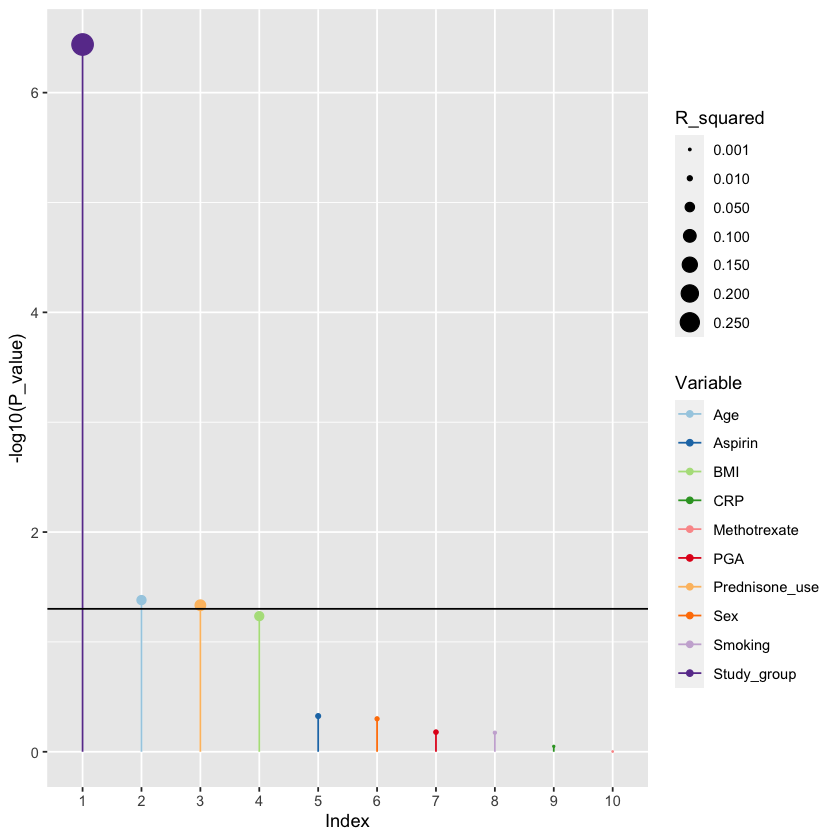

In [30]:
#make a lollipop plot of linear modeling p values
lollipop_plot2 = ggplot(data = linear_models, aes(x = Index, y = -log10(P_value), color = Variable)) +
                geom_point(data = linear_models, aes(x = Index, size = R_squared)) + geom_segment(aes(x=Index,xend=Index, y = 0, yend = -log10(P_value))) + 
                geom_hline(yintercept = -log10(0.05)) + scale_color_brewer(palette="Paired")+
                scale_x_discrete(limits=c("1","2","3","4","5","6","7","8","9","10")) + #+theme_bw()
                scale_size_continuous(range  = c(0.1, 10),limits = c(0, 1), breaks = c(0.001, 0.01,0.05, 0.10, 0.15, 0.20, 0.25))
lollipop_plot2

In [34]:
#save the plot
pdf("../../analysis/Figure_1B_C_D/lollipop_plot_P_values_and_R_squared.pdf", width = 10,height = 10)
print(lollipop_plot2)
dev.off()

pdf 
  2

In [143]:
linear_models

,Variable,R_squared,P_value,n,Index
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
9,Study_group,0.3209482932,3.645508e-07,90,1
11,Statin,0.0764827945,3.243279e-02,60,2
1,Age,0.0463302425,4.161063e-02,90,3
7,Prednisone_use,0.0666894147,4.634969e-02,60,4
3,BMI,0.0452229045,5.824519e-02,80,5
10,Abatacept_lefluomide_methotrexate,0.0141370039,3.655554e-01,60,6
12,Prednisone_dose,0.0278834661,4.463370e-01,23,7
8,Aspirin_clopidogrel,0.0088362284,4.749814e-01,60,8
2,Sex,0.0051587196,5.011195e-01,90,9


In [144]:
#save the linear modeling with PC1 results
write.csv(linear_models,"../../analysis/Figure_1B_C_D/linear_modeling_of_PC1_and_demographic_variables.csv",row.names=FALSE)